In [2]:
from prody import *
from pylab import *
import scipy
import pandas as pd
from functools import reduce
import math
import ast
import seaborn as sns
import glob, os
import logging
logger = logging.Logger('catch_all')

In [3]:
# See the following

# http://prody.csb.pitt.edu/tutorials/evol_tutorial/msaanalysis.html#get-msa-data
# http://prody.csb.pitt.edu/manual/reference/sequence/msa.html
# http://prody.csb.pitt.edu/tutorials/evol_tutorial/msafiles.html#querying

In [4]:
wd=os.getcwd()
df=pd.read_csv('uniprot_out_no_dups_symbol.csv',header=None)

In [5]:
# Get ARM coordinates for all ARM regions scoring 5 and above
arms=pd.read_csv('TF_xcorr_strongarms.csv')
genes=arms['gene_name'].unique()

out_dict={}

for gene in genes:
    block=arms[arms['gene_name']==gene]
    armcoords=[]
    for index, row in block.iterrows():
        # Append cooredinates and take union
        armcoords=reduce(np.union1d, (armcoords, np.arange(row['coord_start'],row['coord_end'])))
        out_dict[gene]=list(armcoords)

# Write the ARM coordinates to a file
out_df=pd.DataFrame.from_dict(out_dict,orient='index')
q = [[j for j in i if not math.isnan(j)] for i in out_df.values] # Renome NaNs and extract values
out_df['coords']=q
out_df=out_df['coords']
out_df.to_csv('TF_strongarms_coords.csv')

In [6]:
# Read the ARM coordinates back in
arm_df=pd.read_csv('TF_strongarms_coords.csv',index_col=0)

In [7]:
def get_entropy(unid,arm_df):
    
    # Read in MSA
    msa = parseMSA(unid+'.fasta')
    seq_list = [seq for seq in msa]

    # Get labels
    label_list=msa.getLabels()
    
    try:
        # Filter to human proteins only
        list_filt=[k for k in label_list if '9606' in k]

        # Get gene symbol from uniprot ID
        symbol = df.iloc[df[df[1] == unid].index][0].values[0]

        # Filter again for correct gene symbol
        # Get id for the human tf of interest
        humid=[k for k in list_filt if symbol in k][0]

        # Refine MSA based on the human TF of interest
        msa_refine = refineMSA(msa, label=humid)

        # Entropy calculation
        H = calcShannonEntropy(msa_refine)
        # showShannonEntropy(msa_refine,list(range(0,msa_refine.numResidues())))

        coords=arm_df.loc[symbol].tolist()[0]
        coords = ast.literal_eval(coords)
        coords = [int(x) for x in coords]

        # Calculate entropy for ARM and rest of protein
        H_arm=H[coords]
        H_rest=np.delete(H, coords)
        medH_arm=np.median(H_arm)
        medH_rest=np.median(H_rest)
                        
    except BaseException as e:
        print(f'Error thrown by gene name {symbol} uniprot ID {unid}')
        logger.error(str(e))
        medH_arm=np.nan
        medH_rest=np.nan

    return medH_arm, medH_rest

In [13]:
# Get filenames containing uniprot IDs
os.chdir(wd+'\msa_out')
id_list=[]
for file in glob.glob('*.fasta'):
    tempTuple = os.path.splitext(file)
    filename = tempTuple[0]
    id_list.append(filename)

In [14]:
# Loop through proteins and calculate Shannon entropy
results=pd.DataFrame()

for unid in id_list:
    medH_arm, medH_rest=get_entropy(unid,arm_df)
    temp_df=pd.DataFrame(data=[[medH_arm,medH_rest]],columns=['median_H_ARM','median_H_rest'])
    results=pd.concat([temp_df,results])

@> 418 sequence(s) with 1507 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1507 to 280 in 0.00s.
@> 505 sequence(s) with 1346 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1346 to 668 in 0.00s.
@> 196 sequence(s) with 2225 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 2225 to 1349 in 0.00s.
@> 680 sequence(s) with 1748 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1748 to 301 in 0.00s.
@> 210 sequence(s) with 713 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 713 to 242 in 0.00s.
@> 243 sequence(s) with 392 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 392 to 193 in 0.00s.
@> 646 sequence(s) with 1538 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1538 to 265 in 0.00s.
@> 234 sequence(s) with 1789 residues were parsed in 0.00s.
@> Label ref

Error thrown by gene name SP100 uniprot ID P23497
Error thrown by gene name PAX3 uniprot ID P23760


@> Label refinement reduced number of columns from 1088 to 272 in 0.00s.
@> 756 sequence(s) with 1013 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1013 to 313 in 0.00s.
@> 891 sequence(s) with 1299 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1299 to 388 in 0.00s.
@> 956 sequence(s) with 1088 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1088 to 260 in 0.00s.
@> 493 sequence(s) with 499 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 499 to 282 in 0.01s.
@> 891 sequence(s) with 1299 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1299 to 330 in 0.00s.
@> 756 sequence(s) with 1013 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1013 to 338 in 0.00s.
@> 654 sequence(s) with 1642 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1642 to 342 in 0.00s

Error thrown by gene name ETV3 uniprot ID P41162


@> Label refinement reduced number of columns from 1688 to 407 in 0.00s.
@> 297 sequence(s) with 1356 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1356 to 727 in 0.00s.
@> 744 sequence(s) with 1300 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1300 to 393 in 0.00s.
@> 744 sequence(s) with 1300 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1300 to 269 in 0.00s.
@> 365 sequence(s) with 2204 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2204 to 401 in 0.00s.
@> 255 sequence(s) with 634 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 634 to 254 in 0.00s.
@> 259 sequence(s) with 550 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 550 to 304 in 0.00s.
@> 511 sequence(s) with 917 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 917 to 406 in 0.00s.
@>

Error thrown by gene name SP140 uniprot ID Q13342


@> 225 sequence(s) with 1307 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1307 to 613 in 0.00s.
@> 556 sequence(s) with 2564 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2564 to 1188 in 0.00s.
@> 234 sequence(s) with 532 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 532 to 205 in 0.00s.
@> 638 sequence(s) with 1480 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1480 to 579 in 0.00s.
@> 523 sequence(s) with 4235 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 4235 to 1292 in 0.00s.
@> 318 sequence(s) with 1636 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1636 to 448 in 0.00s.
@> 744 sequence(s) with 1566 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1566 to 338 in 0.01s.
@> 464 sequence(s) with 2835 residues were parsed in 0.00s.
@> Label 

Error thrown by gene name AEBP2 uniprot ID Q6ZN18


@> Label refinement reduced number of columns from 466 to 235 in 0.00s.
@> 521 sequence(s) with 876 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 876 to 201 in 0.00s.
@> 257 sequence(s) with 1138 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1138 to 690 in 0.00s.
@> 251 sequence(s) with 1979 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1979 to 839 in 0.00s.
@> 198 sequence(s) with 2160 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 2160 to 1209 in 0.00s.
@> 267 sequence(s) with 1498 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1498 to 589 in 0.00s.
@> 264 sequence(s) with 3269 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 3269 to 1883 in 0.00s.
@> 160 sequence(s) with 2006 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2006 to 542 in 0.00

Error thrown by gene name TET1 uniprot ID Q8NFU7


@> 553 sequence(s) with 1312 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1312 to 647 in 0.00s.
@> 291 sequence(s) with 572 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 572 to 206 in 0.00s.
@> 513 sequence(s) with 1387 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1387 to 632 in 0.00s.
@> 288 sequence(s) with 4261 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 4261 to 2301 in 0.00s.
@> 306 sequence(s) with 2759 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2759 to 1163 in 0.00s.
@> 360 sequence(s) with 1455 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1455 to 365 in 0.00s.
@> 277 sequence(s) with 3169 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 3169 to 1742 in 0.01s.
@> 793 sequence(s) with 1559 residues were parsed in 0.00s.
@> Label

Error thrown by gene name E2F7 uniprot ID Q96AV8


@> Label refinement reduced number of columns from 2259 to 1218 in 0.00s.
@> 517 sequence(s) with 2720 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2720 to 1084 in 0.00s.
@> 529 sequence(s) with 1132 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 1132 to 472 in 0.00s.
@> 517 sequence(s) with 2720 residues were parsed in 0.01s.
@> Label refinement reduced number of columns from 2720 to 567 in 0.00s.
@> 120 sequence(s) with 634 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 634 to 310 in 0.00s.
@> 269 sequence(s) with 674 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 674 to 337 in 0.00s.
@> 613 sequence(s) with 2117 residues were parsed in 0.02s.
@> Label refinement reduced number of columns from 2117 to 609 in 0.00s.
@> 206 sequence(s) with 1774 residues were parsed in 0.00s.
@> Label refinement reduced number of columns from 1774 to 1274 in 0.00

Error thrown by gene name CAMTA1 uniprot ID Q9Y6Y1


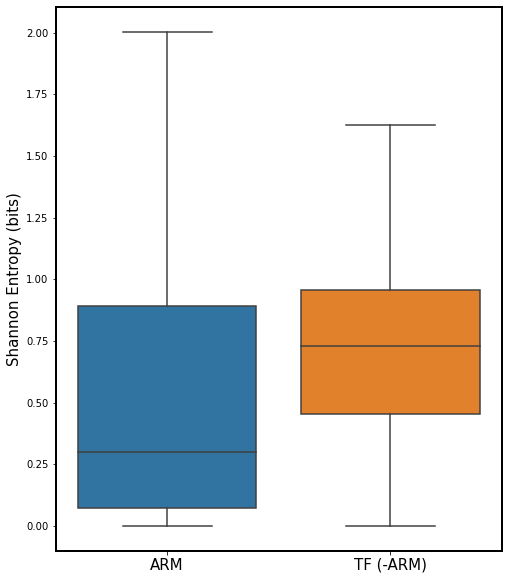

In [15]:
os.chdir(wd)

fig=plt.figure(figsize = (8,10))
ax = plt.axes()
results=results.dropna()
im=sns.boxplot(data = [results['median_H_ARM'].values,results['median_H_rest'].values],ax=ax,showfliers=False)
im.set_xticklabels(['ARM','TF (-ARM)'],fontsize=15)
im.set_ylabel("Shannon Entropy (bits)", fontsize = 15)
ax.grid(False)
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 
ax.figure.savefig('221213_entropy_boxplot.pdf',bbox_inches='tight')
plt.show()

results.to_csv('2221212_entropy.csv',index=False)

C:\Users\13kov\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


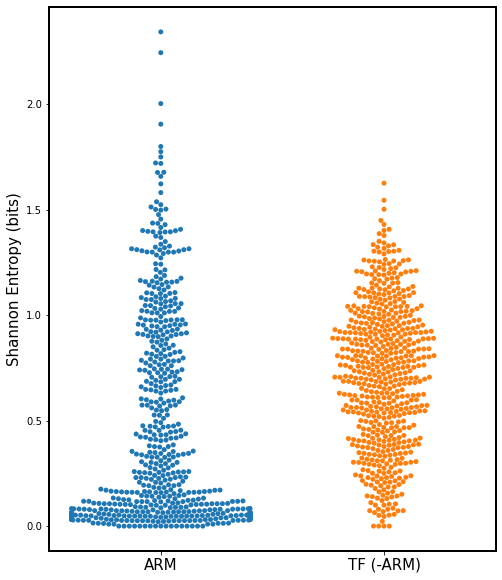

In [17]:
fig=plt.figure(figsize = (8,10))
ax = plt.axes()
im=sns.swarmplot(data = [results['median_H_ARM'].values,results['median_H_rest'].values],ax=ax)
im.set_xticklabels(['ARM','TF (-ARM)'],fontsize=15)
im.set_ylabel("Shannon Entropy (bits)", fontsize = 15)
ax.grid(False)
ax.set_facecolor('white')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('2') 
ax.figure.savefig('221213_entropy_stripplots.pdf',bbox_inches='tight')
plt.show()

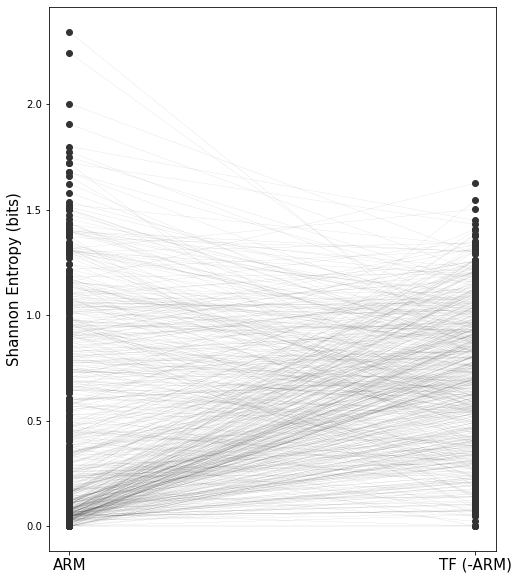

In [52]:
import matplotlib.pyplot as plt

# your input data:
befores = results['median_H_ARM'].values
afters = results['median_H_rest'].values

fig=plt.figure(figsize = (8,10))
ax = plt.axes()

# plotting the lines
for i in range(len(befores)):
    im=plt.plot([0,1], [befores[i], afters[i]], c='0.2', linewidth=0.05)
    
    # plotting the points
plt.scatter(np.zeros(len(befores)), befores,c='0.2')
plt.scatter(np.ones(len(afters)), afters,c='0.2')

plt.xticks([0,1], ['ARM', 'TF (-ARM)'],fontsize=15)
plt.ylabel("Shannon Entropy (bits)", fontsize = 15)

ax.figure.savefig('221213_entropy_paired.pdf',bbox_inches='tight')
plt.show()